In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split#將資料分成訓練組及測試組
import os
from keras.models import Sequential, load_model

dataframe = pd.read_csv('df_USE_lstm_train.csv',
                         encoding = "Big5",na_filter=True).dropna()

2023-03-20 21:15:09.309730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 21:15:09.375754: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-20 21:15:09.720400: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-20 21:15:09.720436: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

In [2]:
dataframe

,公司碼,TSE 產業別,年月,X01_Ln資產總額,X02_流動佔總資產比率,X03_流動佔營業淨收入比率,X04_流動比率,X05_速動比率,X06_總資產週轉率,X07_現金流量比率,...,X14_ROE,X15_利息保障倍數,X16_稅前淨利率,X17_負債比率,X18_長期負債總比率,X19_ROA,N01_是否四大,Y_繼續經營疑慮,Lstm,Datamining
0,1101,1,200803.0,17.860166,0.300649,3.188306,191.69,149.68,0.09,8.36,...,1.67,4.31,11.31,46.86,0.311761,1.13,1,0,1,1
1,1101,1,200806.0,17.811181,0.284241,2.644814,127.04,102.02,0.11,4.89,...,2.70,5.09,10.78,51.40,0.290287,1.58,1,0,1,1
2,1101,1,200809.0,17.637446,0.247127,2.032282,115.39,81.03,0.12,16.79,...,1.48,3.34,7.04,52.06,0.306412,0.98,1,0,1,1
3,1101,1,200812.0,17.594278,0.234187,2.496075,111.71,84.44,0.09,3.01,...,0.90,2.08,4.31,51.70,0.307405,0.72,1,0,1,1
4,1101,1,200903.0,17.697198,0.251429,2.684157,125.29,96.44,0.10,7.61,...,0.53,1.81,2.76,51.81,0.317400,0.50,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46704,9962,10,201612.0,13.596558,0.713315,1.300904,628.99,132.60,0.56,-27.24,...,3.17,407.33,5.92,13.18,0.018407,2.79,0,0,1,1
46705,9962,10,201703.0,13.634926,0.734175,1.263158,870.96,203.10,0.58,68.72,...,4.12,271.80,7.50,10.24,0.018091,3.65,0,0,1,1
46706,9962,10,201706.0,13.678957,0.748912,1.573833,466.70,105.00,0.48,35.69,...,-0.94,-150.78,-2.03,17.81,0.017651,-0.80,0,0,2,1
46707,9962,10,201709.0,13.564384,0.719438,1.428747,805.51,219.06,0.48,76.82,...,0.77,76.93,1.60,10.84,0.019082,0.67,0,0,2,1


In [3]:
#########################驗證集

In [4]:
dataframe_va = pd.read_csv('df_USE_final_Verification.csv',
                         encoding = "Big5",na_filter=True).dropna()

In [5]:
print(dataframe_va.shape)

dataframe_va=dataframe_va.drop(['TSE 產業別','Lstm','Datamining'], axis=1)#刪除非必要欄位

total_va = dataframe_va.shape  #資料總變數與總資料筆數
total_class_va = dataframe_va.Y_繼續經營疑慮.value_counts()
print(total_va)
print(total_class_va)

(25629, 26)
(25629, 23)
0    25476
1      153
Name: Y_繼續經營疑慮, dtype: int64


In [6]:
X_va = []
Y_va = []
j_va = 0
for j in range(len(dataframe_va )-5):
    if dataframe_va .iloc[j,0] == dataframe_va .iloc[j+5,0]:  
        X_va.append(dataframe_va.iloc[j:j+4,2:22].values)  #scaled_dataset_
        Y_va.append(dataframe_va.iloc[j+5,22])
    j_va += 1

In [7]:
Y_va

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [8]:
Y_va_c =pd.DataFrame(Y_va)
total_class_va_c = Y_va_c.value_counts()
print(total_class_va_c)

0    17236
1       67
dtype: int64


In [9]:
X_va =np.array(X_va)
Y_va =np.array(Y_va)
print(X_va.shape)
print(Y_va.shape)

(17303, 4, 20)
(17303,)


In [10]:
##################################END 驗證集

In [11]:
print(dataframe.shape)

dataframe=dataframe.drop(['TSE 產業別','Lstm','Datamining'], axis=1)#刪除非必要欄位

total = dataframe.shape  #資料總變數與總資料筆數
total_class = dataframe.Y_繼續經營疑慮.value_counts()
print(total)
print(total_class)

(46709, 26)
(46709, 23)
0    46111
1      598
Name: Y_繼續經營疑慮, dtype: int64


In [12]:
pd.set_option('display.max_columns', None)
dataframe.describe()

,公司碼,年月,X01_Ln資產總額,X02_流動佔總資產比率,X03_流動佔營業淨收入比率,X04_流動比率,X05_速動比率,X06_總資產週轉率,X07_現金流量比率,X08_銷貨毛利率,X09_負債權益比,X10_存貨週轉次數,X11_應收帳款週轉次數,X12_淨值佔資產比率,X13_保留盈餘對總資產比例,X14_ROE,X15_利息保障倍數,X16_稅前淨利率,X17_負債比率,X18_長期負債總比率,X19_ROA,N01_是否四大,Y_繼續經營疑慮
count,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,4.670900e+04,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000,46709.000000
mean,4190.379520,201275.857907,14.843288,0.594193,32.624221,250.970424,169.394443,0.253485,7.740377,21.011511,1.075441,16.689591,15.377842,57.183854,0.113850,1.815703,8.883992e+02,-22.034004,42.816146,0.103589,1.207438,0.879809,0.012803
std,2303.639462,284.957147,1.418051,0.202376,1977.043693,633.960245,409.724750,0.199360,78.572711,273.769772,4.713158,1007.823544,973.436881,16.260036,0.413443,14.142130,2.114723e+04,1315.850408,16.260036,0.107288,3.563543,0.325188,0.112423
min,1101.000000,200803.000000,8.608313,0.007005,0.098168,0.810000,0.020000,0.000000,-11155.200000,-19775.160000,0.005666,-10.650000,0.000000,0.170000,-38.510625,-2215.580000,-2.485306e+06,-150190.000000,0.560000,0.000000,-431.410000,0.000000,0.000000
25%,2396.000000,201012.000000,13.874244,0.457896,1.909710,139.670000,80.160000,0.140000,-1.280000,11.180000,0.450792,0.760000,0.960000,45.910000,0.052018,0.230000,2.240000e+00,1.000000,31.070000,0.024044,0.230000,1.000000,0.000000
50%,3501.000000,201306.000000,14.678191,0.606752,2.631614,181.610000,118.840000,0.210000,5.830000,19.250000,0.745364,1.310000,1.390000,57.290000,0.117626,1.910000,1.449000e+01,5.690000,42.710000,0.069857,1.140000,1.000000,0.000000
75%,6105.000000,201509.000000,15.635702,0.744009,3.734403,255.200000,178.660000,0.310000,15.210000,30.090000,1.177941,2.170000,2.200000,68.930000,0.203391,3.920000,6.143000e+01,12.340000,54.090000,0.153558,2.270000,1.000000,0.000000
max,9962.000000,201712.000000,21.733461,0.999645,339244.100000,55079.490000,26744.130000,4.460000,3261.760000,52580.000000,593.802050,173462.000000,141607.000000,99.440000,0.750217,817.740000,2.629103e+06,44890.830000,99.830000,0.957482,92.750000,1.000000,1.000000


In [13]:
dataframe

,公司碼,年月,X01_Ln資產總額,X02_流動佔總資產比率,X03_流動佔營業淨收入比率,X04_流動比率,X05_速動比率,X06_總資產週轉率,X07_現金流量比率,X08_銷貨毛利率,X09_負債權益比,X10_存貨週轉次數,X11_應收帳款週轉次數,X12_淨值佔資產比率,X13_保留盈餘對總資產比例,X14_ROE,X15_利息保障倍數,X16_稅前淨利率,X17_負債比率,X18_長期負債總比率,X19_ROA,N01_是否四大,Y_繼續經營疑慮
0,1101,200803.0,17.860166,0.300649,3.188306,191.69,149.68,0.09,8.36,13.91,0.881842,2.16,2.08,53.14,0.086722,1.67,4.31,11.31,46.86,0.311761,1.13,1,0
1,1101,200806.0,17.811181,0.284241,2.644814,127.04,102.02,0.11,4.89,10.66,1.057768,2.60,2.40,48.60,0.061806,2.70,5.09,10.78,51.40,0.290287,1.58,1,0
2,1101,200809.0,17.637446,0.247127,2.032282,115.39,81.03,0.12,16.79,9.57,1.085863,2.64,2.39,47.94,0.069877,1.48,3.34,7.04,52.06,0.306412,0.98,1,0
3,1101,200812.0,17.594278,0.234187,2.496075,111.71,84.44,0.09,3.01,5.35,1.070584,2.15,1.98,48.30,0.075107,0.90,2.08,4.31,51.70,0.307405,0.72,1,0
4,1101,200903.0,17.697198,0.251429,2.684157,125.29,96.44,0.10,7.61,9.73,1.075014,2.62,2.03,48.19,0.073696,0.53,1.81,2.76,51.81,0.317400,0.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46704,9962,201612.0,13.596558,0.713315,1.300904,628.99,132.60,0.56,-27.24,8.55,0.151827,0.97,6.03,86.82,0.061342,3.17,407.33,5.92,13.18,0.018407,2.79,0,0
46705,9962,201703.0,13.634926,0.734175,1.263158,870.96,203.10,0.58,68.72,10.27,0.114064,0.95,7.99,89.76,0.096990,4.12,271.80,7.50,10.24,0.018091,3.65,0,0
46706,9962,201706.0,13.678957,0.748912,1.573833,466.70,105.00,0.48,35.69,0.69,0.216720,0.85,9.23,82.19,0.040200,-0.94,-150.78,-2.03,17.81,0.017651,-0.80,0,0
46707,9962,201709.0,13.564384,0.719438,1.428747,805.51,219.06,0.48,76.82,4.04,0.121574,0.85,8.85,89.16,0.050125,0.77,76.93,1.60,10.84,0.019082,0.67,0,0


In [14]:
#建立公司名單集合
Name = []
i = 0
for i in range(len(dataframe)):
    Name.append(dataframe.iloc[i,0])
    i += 1
print(len(Name))
print(type(Name))
Nameset = set(Name)
print(len(Nameset))

46709
<class 'list'>
1724


In [15]:
# window 建立四期觀測資料集
X = []
Y = []
j = 0
for j in range(len(dataframe)-5):
    if dataframe.iloc[j,0] == dataframe.iloc[j+5,0]:  
        X.append(dataframe.iloc[j:j+4,2:22].values)  #scaled_dataset_
        Y.append(dataframe.iloc[j+5,22])
    j += 1

In [16]:
Y_c =pd.DataFrame(Y)
total_class_c = Y_c.value_counts()
print(total_class_c)

0    37804
1      320
dtype: int64


In [17]:
print(j, len(X), len(Y))
print(type(X))

46704 38124 38124
<class 'list'>


In [18]:
X =np.array(X)
Y =np.array(Y)
print(X.shape)
print(Y.shape)

(38124, 4, 20)
(38124,)


In [19]:
np.set_printoptions(threshold=np.inf)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
# #將資料打散，而非照日期排序

def shuffle(X,Y):
  np.random.seed(10)
  randomList = np.arange(X.shape[0])
  np.random.shuffle(randomList)
  return X[randomList], Y[randomList]

In [21]:
# #將Training Data取一部份當作Test Data
def splitData(X,Y,rate):
  x_train = X[int(X.shape[0]*rate):]
  y_train = Y[int(Y.shape[0]*rate):]
  x_test = X[:int(X.shape[0]*rate)]
  y_test = Y[:int(Y.shape[0]*rate)]
  return x_train, y_train, x_test, y_test

In [22]:

# shuffle the data, and random seed is 10
X_train, Y_train = shuffle(X, Y)

# split training data and validation data
x_train, y_train, x_test, y_test = splitData(X_train, Y_train, 0.2)

print("資料型別",type(x_train))      #列印陣列資料型別
print("陣列元素資料型別：",x_train.dtype) #列印陣列元素資料型別
print("陣列元素總數：",x_train.size)   #列印陣列尺寸，即陣列元素總數
print("陣列形狀：",x_train.shape)     #列印陣列形狀
print("陣列的維度數目",x_train.ndim)   #列印陣列的維度數目
print("資料型別",type(y_train))      #列印陣列資料型別
print("陣列元素資料型別：",y_train.dtype) #列印陣列元素資料型別
print("陣列元素總數：",y_train.size)   #列印陣列尺寸，即陣列元素總數
print("陣列形狀：",y_train.shape)     #列印陣列形狀
print("陣列的維度數目",y_train.ndim)   #列印陣列的維度數目
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

資料型別 <class 'numpy.ndarray'>
陣列元素資料型別： float64
陣列元素總數： 2440000
陣列形狀： (30500, 4, 20)
陣列的維度數目 3
資料型別 <class 'numpy.ndarray'>
陣列元素資料型別： int64
陣列元素總數： 30500
陣列形狀： (30500,)
陣列的維度數目 1


In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.constraints import MaxNorm as maxnorm
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import TimeDistributed
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(4, 20), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(16, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(8, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error'
              ,optimizer='adam'
              )
# ,metrics=['accuracy']
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                21760     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 24,513
Trainable params: 24,513
Non-traina

2023-03-20 21:15:17.984003: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 21:15:18.002089: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-03-20 21:15:18.002104: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-20 21:15:18.002427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

In [24]:

batch_size = 2000
epochs = 2000

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'LSTM_trained_model.h5'

# Use ModelCheckpoint to save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=300, verbose=1)


cw = {0:0.01 , 1:1}
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data= (x_test, y_test),
                    class_weight=cw,callbacks=[earlystop, checkpoint])


# loading our save model

print("Loading trained model")
model = load_model(model_path)

# score, acc = model.evaluate(x_test, y_test)

Epoch 1/2000
14/16 [=========================>....] - ETA: 0s - loss: 0.0045
Epoch 1: val_loss improved from inf to 0.18511, saving model to /home/kiwi/Downloads/畢業靠二姊-20230319T142631Z-001/畢業靠二姊/saved_models/LSTM_trained_model.h5
16/16 [==============================] - 1s 25ms/step - loss: 0.0045 - val_loss: 0.1851
Epoch 2/2000
12/16 [=====================>........] - ETA: 0s - loss: 0.0045
Epoch 2: val_loss did not improve from 0.18511
16/16 [==============================] - 0s 12ms/step - loss: 0.0044 - val_loss: 0.1880
Epoch 3/2000
13/16 [=======================>......] - ETA: 0s - loss: 0.0043
Epoch 3: val_loss did not improve from 0.18511
16/16 [==============================] - 0s 15ms/step - loss: 0.0044 - val_loss: 0.1855
Epoch 4/2000
12/16 [=====================>........] - ETA: 0s - loss: 0.0041
Epoch 4: val_loss improved from 0.18511 to 0.18127, saving model to /home/kiwi/Downloads/畢業靠二姊-20230319T142631Z-001/畢業靠二姊/saved_models/LSTM_trained_model.h5
16/16 [=================

In [25]:
#在訓練集訓練結果
import math
y_train_predict_0=model.predict(x_train)
y_train_predict_1=y_train_predict_0[:,0]
y_train_predict_2=[np.round(i) for i in y_train_predict_1] 
y_train_predict_3=np.array(y_train_predict_2)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(y_train,y_train_predict_3))
print("混淆矩陣：")
print(metrics.confusion_matrix(y_train,y_train_predict_3))

954/954 [==============================] - 3s 3ms/step
精準度指標：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30250
           1       0.82      0.99      0.90       250

    accuracy                           1.00     30500
   macro avg       0.91      1.00      0.95     30500
weighted avg       1.00      1.00      1.00     30500

混淆矩陣：
[[30194    56]
 [    2   248]]


In [26]:
y_train_predict_2

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [27]:
#測試集結果
y_test_predict=model.predict(x_test)
y_test_predict=y_test_predict[:,0]
y_test_predict=[np.round(i) for i in y_test_predict]
y_test_predict=np.array(y_test_predict)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(y_test,y_test_predict))
print("混淆矩陣：")
print(metrics.confusion_matrix(y_test,y_test_predict))

239/239 [==============================] - 1s 2ms/step
精準度指標：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7554
           1       0.82      0.86      0.84        70

    accuracy                           1.00      7624
   macro avg       0.91      0.93      0.92      7624
weighted avg       1.00      1.00      1.00      7624

混淆矩陣：
[[7541   13]
 [  10   60]]


In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

precision = precision_score(y_test,y_test_predict)
recall = recall_score(y_test,y_test_predict)
f1 = f1_score(y_test,y_test_predict)
roc_auc_score = roc_auc_score(y_test,y_test_predict)
print(precision)
print(recall)
print(f1)
print(roc_auc_score)

0.821917808219178
0.8571428571428571
0.8391608391608392
0.9277109572979312


In [29]:
#驗證集結果
Y_va_predict=model.predict(X_va)
Y_va_predict=Y_va_predict[:,0]
Y_va_predict=[np.round(i) for i in Y_va_predict]
Y_va_predict=np.array(Y_va_predict
                     )
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(Y_va,Y_va_predict))
print("混淆矩陣：")
print(metrics.confusion_matrix(Y_va,Y_va_predict))

541/541 [==============================] - 1s 1ms/step
精準度指標：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17236
           1       0.38      0.73      0.50        67

    accuracy                           0.99     17303
   macro avg       0.69      0.86      0.75     17303
weighted avg       1.00      0.99      1.00     17303

混淆矩陣：
[[17155    81]
 [   18    49]]


In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(Y_va,Y_va_predict)
precision = precision_score(Y_va,Y_va_predict)
recall = recall_score(Y_va,Y_va_predict)
f1 = f1_score(Y_va,Y_va_predict)
roc_auc_score = roc_auc_score(Y_va,Y_va_predict)

print(accuracy)
print(precision)
print(recall)
print(f1)

0.9942784488239034
0.3769230769230769
0.7313432835820896
0.4974619289340101


In [31]:
# y_predict

In [32]:
y_va_predict=model.predict(X_va)
y_va_predict=y_va_predict[:,0]
y_va_predict=[int(i) for i in y_va_predict]
y_va_predict=np.array(y_va_predict)
from sklearn import metrics
print("精準度指標：")
print(metrics.classification_report(Y_va,y_va_predict))
print("混淆矩陣：")
print(metrics.confusion_matrix(Y_va,y_va_predict))

541/541 [==============================] - 1s 2ms/step
精準度指標：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17236
           1       0.00      0.00      0.00        67

    accuracy                           1.00     17303
   macro avg       0.50      0.50      0.50     17303
weighted avg       0.99      1.00      0.99     17303

混淆矩陣：
[[17236     0]
 [   67     0]]


/home/kiwi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kiwi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kiwi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'loss': [0.004480474628508091, 0.004426789004355669, 0.004352746065706015, 0.0042292270809412, 0.004050383344292641, 0.003771084127947688, 0.003466013353317976, 0.003122918074950576, 0.002814633073285222, 0.002504516625776887, 0.0022562851663678885, 0.0020403957460075617, 0.0018344525014981627, 0.0016734044766053557, 0.0015785015420988202, 0.0014705804642289877, 0.0013882291968911886, 0.0012990589020773768, 0.0012673338642343879, 0.0011628966312855482, 0.0011541127460077405, 0.0010895556770265102, 0.0010606771102175117, 0.0010461871279403567, 0.0009990704711526632, 0.0009855028474703431, 0.0009248716523870826, 0.0008990474743768573, 0.0008745299419388175, 0.0008572021615691483, 0.0008536005625501275, 0.000825336785055697, 0.0007993665640242398, 0.0008028130978345871, 0.000773648323956877, 0.000775390537455678, 0.0007673485670238733, 0.0007642138516530395, 0.0008136603282764554, 0.0007427817326970398, 0.0007993559702299535, 0.0007555034244433045, 0.0007137591019272804, 0.00075461051892

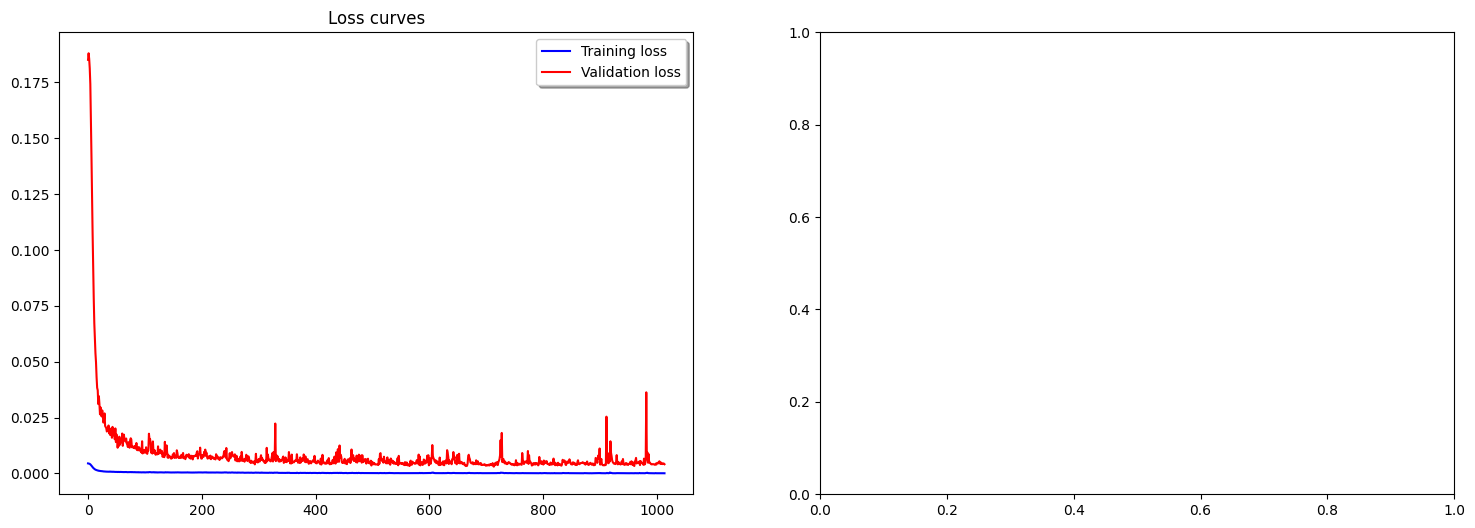

In [33]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(history.history['loss'], color='b', label='Training loss')
axs[0].plot(history.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
print(history.history)
if 'accuracy' in history.history:
    axs[1].plot(history.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)


In [34]:
################################

In [36]:
# # 創建模型
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, 23)))

# # 編譯模型
# model.compile(optimizer='adam', loss='mse')

# # 訓練模型
# model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

 
# # 生成預測
# trainpred = model.predict(x_train)
 
# # 將標準化後的數據轉換為原始數據
# trainpred = scaler.inverse_transform(trainpred)
 
# # 計算 RMSE
# trainScore = math.sqrt(mean_squared_error(y_train[0], trainpred[:, 0]))
 
# # 訓練預測
# trainpredPlot = np.empty_like(dataset)
 
# # 測試預測
 
# # 繪製所有預測
# inversetransform = plt.plot(scaler.inverse_transform(dataset))


In [37]:
 # 將資料組成變好看一點
# x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))
# x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))

In [38]:
print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (30500, 4, 20)
y_train size: (30500,)
X_test size: (7624, 4, 20)
y_test size: (7624,)


In [39]:
import tensorflow as tf
from tensorflow.keras import Sequential  #打開空白的網路神經網路機

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM


model = Sequential() 
# model.add(Dense(8, input_shape=(x_train.shape[0], x_train.shape[1])))

model.add(LSTM(8, input_shape=(1,23),activation="relu",return_sequences=True)) 
# model.add(LSTM(84, return_sequences= True)) 
# model.add(Dropout(0.2))
model.add(LSTM(8,activation="sigmoid"))
model.add(Dropout(0.5)) # Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
# from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy']) 
#以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)
model.summary()

#3*(32+1)
# model = Sequential()model.add(TimeDistributed(Dense(8), input_shape=(10, 16)))
# 输出还是10个向量，但是输出的维度由16变成了8，也就是（32,10,8）
#batch_size: 批尺寸，一次喂给lstm的数据量
#time_size: 时间步长，序列数据的长度
#feature_size: 特征维度，每个时间点输入数据的维度

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 8)              1024      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


In [40]:
# history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size,validation_data= (x_test, y_test),verbose=2)
# score, acc = model.evaluate(x_test, y_test)



In [41]:
###測試資料

In [42]:
import numpy 
import random
import pandas as pd
from pandas import Series, DataFrame

In [43]:
df = pd.DataFrame({'N' : ['a', 'a', 'a','a','a','b','b','b','b','b','b','c','c','c','c','c','c','c','c','d','d','d','d','d','e','e','e','e'],
                   'year':['200903','200906','200909','200912','201003','200903','200906','200909','200912','201003','201006',
                           '200903','200906','200909','200912','201003','201006','201009','200812','200903','200906','200909',
                           '200912','201003','201012','200903','200906','200909'],
                   'Y' : [1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1]})
df

,N,year,Y
0,a,200903,1
1,a,200906,1
2,a,200909,1
3,a,200912,0
4,a,201003,1
5,b,200903,1
6,b,200906,1
7,b,200909,1
8,b,200912,1
9,b,201003,1


In [44]:
x = 4
n = 1
o = 0
t = 0
tt = 0

df["L"]=0
df["D"]=0
for name, group in df.groupby('N'):      
    if(numpy.any(group['Y']!= 0) ):
        if(len(group)-(x-1)<0):
            group ["L"]=0
        else:
            
            for i in range(t,t+len(group)-x+1):    
                if (numpy.all(group[i-t:i+n-t]['Y']==1)):
                    group.at [i,"L"]=1
                else:
                    group.at [i,"L"]=0                         
    else:

        if(len(group)-(x-1)<0):
            group ["L"]= 0
        else:
            for i in range(t,t+len(group)-x+1):    
                if (numpy.all(group[i-t:i+x-t]['Y']==0)):
                    group.at [i,"L"]= 1
                else:
                    group.at [i,"L"]= 0    
    df[t:t+len(group)]=group[:len(group)]        
    t+=len(group)

for name, group in df.groupby('N'):
    for d in range(len(group)):
        va_a = group.Y[d:d+1]
        if va_a.loc[d+o] == 1 or 2:
#             print(d+3)
#             print(group)
            if d+3 < len(group):
                for j in range(d+1,d+4):
                    va_l = group.L[j:j+1]
#                     print(j+t)
                    if va_l.loc[j+o] == 0:
                        group.at [j+o,"L"]= 2
    df[o:o+len(group)]=group[:len(group)] 
    o = o+len(group) 
    
print (df)       

#     print(t+=len(group))
    
    


    N    year  Y  L  D
0   a  200903  1  1  0
1   a  200906  1  1  0
2   a  200909  1  2  0
3   a  200912  0  2  0
4   a  201003  1  2  0
5   b  200903  1  1  0
6   b  200906  1  1  0
7   b  200909  1  1  0
8   b  200912  1  2  0
9   b  201003  1  2  0
10  b  201006  1  2  0
11  c  200903  0  0  0
12  c  200906  1  1  0
13  c  200909  0  2  0
14  c  200912  0  2  0
15  c  201003  1  1  0
16  c  201006  1  2  0
17  c  201009  1  2  0
18  c  200812  0  2  0
19  d  200903  0  1  0
20  d  200906  0  1  0
21  d  200909  0  2  0
22  d  200912  0  2  0
23  d  201003  0  2  0
24  e  201012  0  0  0
25  e  200903  1  2  0
26  e  200906  1  2  0
27  e  200909  1  2  0


In [45]:
########################################111111
window_size = 3
series_s = df.copy()
# gg=0


indexNames = df[ df['L'] != 1 ].index
df.drop(indexNames , inplace=True)

# for mm,group in df.groupby('N'):
#     for kk in range(len(group)):
for ii in range(window_size):
    df = pd.concat([series_s.shift((ii-1)),df[['L','D']]], axis = 1)
                
df.dropna(axis=0, inplace=True)
#             df[gg:gg+len(group)]=group[:len(group)]
#     gg+=len(group) 
df
#     df.dropna(axis=0, inplace=True)
# group

,N,year,Y,L,D,L,L,L,D,D,D
1,a,200903,1.0,1.0,0.0,1,2.0,1.0,0,0.0,0.0
5,a,201003,1.0,2.0,0.0,1,1.0,1.0,0,0.0,0.0
6,b,200903,1.0,1.0,0.0,1,1.0,1.0,0,0.0,0.0
7,b,200906,1.0,1.0,0.0,1,2.0,1.0,0,0.0,0.0
12,c,200903,0.0,0.0,0.0,1,2.0,1.0,0,0.0,0.0
15,c,200912,0.0,2.0,0.0,1,2.0,1.0,0,0.0,0.0
19,c,200812,0.0,2.0,0.0,1,1.0,1.0,0,0.0,0.0
20,d,200903,0.0,1.0,0.0,1,2.0,1.0,0,0.0,0.0
